In [67]:
from sqlalchemy import create_engine, text

In [68]:
engine = create_engine("sqlite:///landon.sqlite")
with engine.connect() as conn:
    res=conn.execute(text("SELECT name FROM sqlite_master"))
    tables = [table[0] for table in res.fetchall()]
    print(tables)

['sales']


In [69]:
import pandas as pd

In [70]:
df_sales = pd.read_sql_table("sales", con=engine.connect())

In [71]:
df_sales

,order_id,property_id,property_city,property_state,product_id,product_category,product_name,quantity,product_price,order_total
0,1,17,Las Vegas,Nevada,41,Furnishings,Office Chair,1,85.0,85.0
1,2,15,Chicago,Illinois,54,Furnishings,Chest of Drawers,2,150.0,300.0
2,3,5,Kansas City,Missouri,71,Maintenance,Hammer,2,17.0,34.0
3,4,19,Los Angeles,California,3,Housekeeping,Washcloth,2,3.0,6.0
4,5,12,Dallas,Texas,45,Furnishings,Computer Desk,3,102.0,306.0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,3,Portland,Oregon,47,Furnishings,Swivel Chair,2,75.0,150.0
4996,4997,12,Dallas,Texas,57,Furnishings,Wireless Router,1,70.0,70.0
4997,4998,7,Boston,Massachusetts,77,Public Areas,Large Area Rug,1,40.0,40.0
4998,4999,17,Las Vegas,Nevada,57,Furnishings,Wireless Router,1,70.0,70.0


In [72]:
import matplotlib.pyplot as plt

In [76]:
sorted_df = df_sales['product_category'].value_counts().sort_values()
sorted_df

product_category
Office Supplies     664
Maintenance         804
Housekeeping       1063
Public Areas       1101
Furnishings        1368
Name: count, dtype: int64

<Axes: ylabel='count'>

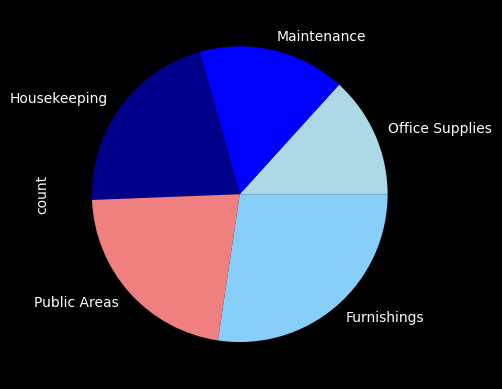

In [77]:
colors = ['lightblue', 'blue', 'darkblue', 'lightcoral', 'lightskyblue']

sorted_df.plot(kind='pie', colors=colors)